<a href="https://colab.research.google.com/github/amankumar1906/Comparative-Analysis-of-ML-for-Volatile-Dataset/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib. pyplot as plt

In [ ]:
df = pd.read_csv("TSLA.csv")
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700


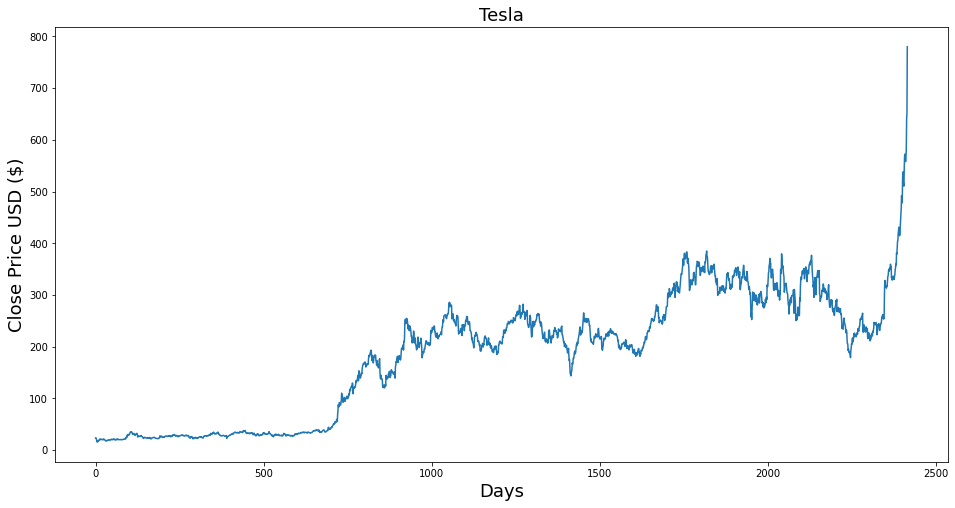

In [ ]:
plt.figure(figsize=(16, 8) )
plt.title('Tesla', fontsize = 18)
plt.xlabel('Days' , fontsize = 18)
plt.ylabel('Close Price USD ($)' , fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [ ]:
df = df[['Close']]
df.head(4)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001


In [ ]:
future_days = 30
#Create a new column (the target or dependent variable) shifted
df['Prediction'] = df[['Close']].shift(-future_days)
#print the data
df.tail(4)

,Close,Prediction
2412,580.989990,NaN
2413,640.809998,NaN
2414,650.570007,NaN
2415,780.000000,NaN


In [ ]:
x=np.array(df.drop(['Prediction'],1))[:-future_days]
print(x)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [381.5     ]
 [378.98999 ]
 [393.149994]]


In [ ]:
y=np.array(df['Prediction'])[:-future_days]
print(y)

[ 17.9       17.6       18.32     ... 640.809998 650.570007 780.      ]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [ ]:
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)

[[326.579987]
 [335.540009]
 [337.140015]
 [345.089996]
 [349.929993]
 [346.109985]
 [349.350006]
 [352.170013]
 [349.98999 ]
 [359.519989]
 [352.220001]
 [354.829987]
 [333.040009]
 [336.339996]
 [328.920013]
 [331.290009]
 [329.940002]
 [334.869995]
 [336.200012]
 [333.029999]
 [330.369995]
 [335.890015]
 [339.529999]
 [348.839996]
 [352.700012]
 [359.679993]
 [358.390015]
 [381.5     ]
 [378.98999 ]
 [393.149994]]


In [ ]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[331.8274422  340.73305653 342.32334687 350.22505345 355.03566068
 351.2388488  354.45919552 357.26207868 355.09529337 364.56742365
 357.31176314 359.9059006  338.24823721 341.5281858  334.15325893
 336.50886368 335.16705428 340.06711104 341.38905182 338.23828799
 335.59443625 341.0809372  344.69881824 353.95228244 357.78885938
 364.72645606 363.44431116 386.41396612 383.91919757 397.99321822]


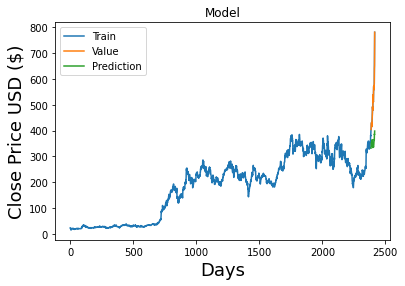

In [ ]:
pd.set_option('mode.chained_assignment', None)
predictions = lr_prediction
valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.title('Model')
plt.xlabel('Days',fontsize = 18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Value', 'Prediction' ])

In [ ]:
rms=np.sqrt(np.mean(np.power((lr_prediction-x_future),2)))
rms

23.162673659753082